# 필요 라이브러리 import

In [ ]:
import cv2 as cv
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from google.colab.patches import cv2_imshow

# ResNet50 모델 로드

- ImageNet 데이터셋에 대해 사전 훈련된 ResNet-50 모델을 로드
표준적인 224x224 픽셀 크기의 컬러 이미지를 입력으로 받고, ImageNet의 1000가지 클래스 중 하나로 이미지를 분류할 수 있는 완전 훈련된 모델 로드

In [ ]:
#ResNet50 함수를 사용하여, ImageNet 데이터셋으로 사전 학습된 가중치를 가진 ResNet50 모델을 로드
model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


# 이미지 읽어오기

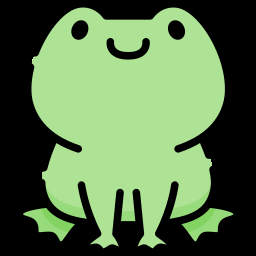

In [ ]:
img = cv.imread("/content/frog.png")
cv2_imshow(img)

# 이미지 전처리

In [ ]:
# OpenCV를 사용하여 이미지를 ResNet50 모델이 요구하는 입력 크기인 224x224로 리사이즈
# 리사이즈된 이미지를 모델의 입력 형태에 맞게 차원을 변경합니다.
# 여기서 (1, 224, 224, 3)은 배치 크기 1, 높이 224, 너비 224, 채널 3(RGB)을 의미
x = np.reshape(cv.resize(img, (224,224)), (1,224,224,3))

In [ ]:
x = preprocess_input(x) # 전처리

# 예측 수행

In [ ]:
#예측 수행
preds = model.predict(x)

# 예측 결과를 해석하여 상위 5개의 예측 결과를 가져옵니다.
# 각 결과는 클래스 ID, 레이블 이름, 예측 확률로 구성
top5 = decode_predictions(preds, top=5)[0]
print('예측 결과:', top5)

35363/35363 [==============================] - 0s 0us/step
예측 결과: [('n03595614', 'jersey', 0.6019775), ('n07248320', 'book_jacket', 0.054353002), ('n06359193', 'web_site', 0.025226101), ('n04370456', 'sweatshirt', 0.024304641), ('n02834397', 'bib', 0.023732614)]


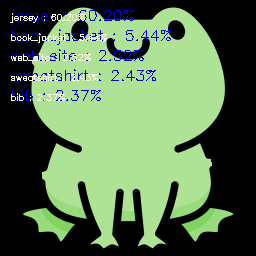

In [ ]:
# 예측 결과를 이미지에 표시
for i, (_, label, score) in enumerate(top5):
  label_text = '{} : {:.2f}%'.format(label, score*100)
  cv.putText(img, label_text, (10,20+i*20), cv.FONT_HERSHEY_SIMPLEX, 0.3, (225,255,255), 1)

# 이미지를 출력
cv2_imshow(img)